In [1]:
# ===============================
# Qiskit Qubit Measurement Assignment
# Author: Sanjay-dev22
# Forked from: arunpandianj/Qiskit_qubit_Measure
# ===============================

# Install required packages
!pip install qiskit qiskit-aer --upgrade -q
!pip install pylatexenc

# Import libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from IPython.display import display

# Create Aer simulator instance
sim = AerSimulator()


=== |0⟩ State ===


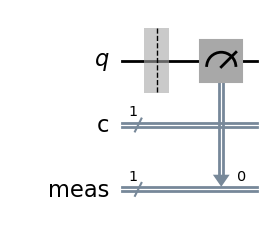

Measurement Result (512 shots): {'0 0': 512}

=== |1⟩ State ===


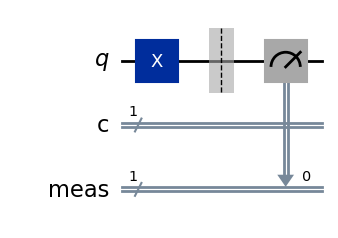

Measurement Result (512 shots): {'1 0': 512}

Explanation: Both |0⟩ and |1⟩ states give deterministic results since measurement of basis states is fixed.


In [2]:
# ===============================
# Task 1 — Verify |0⟩ and |1⟩
# ===============================
# Objective:
#  - Run the given circuits for |0⟩ and |1⟩ states.
#  - Record measurement counts for 512 shots.
#  - Observe whether the results are deterministic or random.

# |0> state
qc0 = QuantumCircuit(1, 1)
qc0.measure_all()
job0 = sim.run(transpile(qc0, sim), shots=512).result()
counts0 = job0.get_counts()
print("=== |0⟩ State ===")
display(qc0.draw(output='mpl'))
print("Measurement Result (512 shots):", counts0)

# |1> state (apply X)
qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.measure_all()
job1 = sim.run(transpile(qc1, sim), shots=512).result()
counts1 = job1.get_counts()
print("\n=== |1⟩ State ===")
display(qc1.draw(output='mpl'))
print("Measurement Result (512 shots):", counts1)

print("\nExplanation: Both |0⟩ and |1⟩ states give deterministic results since measurement of basis states is fixed.")


=== |0⟩ with 10 Shots ===


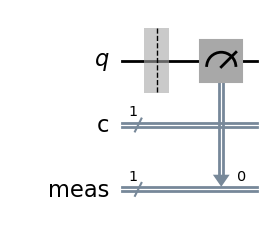

Measurement Result (10 shots): {'0 0': 10}

=== |0⟩ with 1000 Shots ===


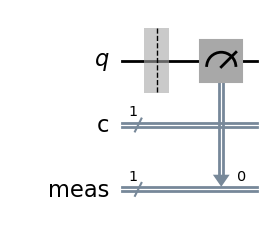

Measurement Result (1000 shots): {'0 0': 1000}

Explanation: Both results remain the same (all |0⟩). The number of shots only affects statistical sampling — deterministic states always yield the same outcome.


In [3]:
# ===============================
# Task 2 — Change the number of shots
# ===============================
# Objective:
#  - Run the same |0⟩ circuit with 10 and 1000 shots.
#  - Observe if results change and explain why.

# |0> with 10 shots
qc0_10 = QuantumCircuit(1, 1)
qc0_10.measure_all()
job_10 = sim.run(transpile(qc0_10, sim), shots=10).result()
counts_10 = job_10.get_counts()
print("=== |0⟩ with 10 Shots ===")
display(qc0_10.draw(output='mpl'))
print("Measurement Result (10 shots):", counts_10)

# |0> with 1000 shots
qc0_1000 = QuantumCircuit(1, 1)
qc0_1000.measure_all()
job_1000 = sim.run(transpile(qc0_1000, sim), shots=1000).result()
counts_1000 = job_1000.get_counts()
print("\n=== |0⟩ with 1000 Shots ===")
display(qc0_1000.draw(output='mpl'))
print("Measurement Result (1000 shots):", counts_1000)

print("\nExplanation: Both results remain the same (all |0⟩). The number of shots only affects statistical sampling — deterministic states always yield the same outcome.")


=== Superposition with Hadamard (|+⟩) ===


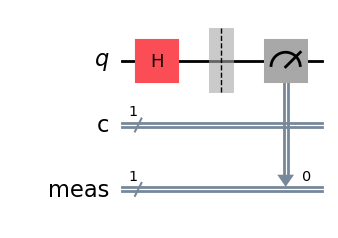

Measurement Result (512 shots): {'0 0': 253, '1 0': 259}

Explanation: The Hadamard creates an equal superposition of |0⟩ and |1⟩, so the outcomes are probabilistic (~50%-50%).


In [4]:
# ===============================
# Task 3 — Superposition with Hadamard
# ===============================
# Objective:
#  - Apply a Hadamard gate (H) before measurement.
#  - Observe whether the results are deterministic or probabilistic.

qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure_all()
job_h = sim.run(transpile(qc_h, sim), shots=512).result()
counts_h = job_h.get_counts()
print("=== Superposition with Hadamard (|+⟩) ===")
display(qc_h.draw(output='mpl'))
print("Measurement Result (512 shots):", counts_h)
print("\nExplanation: The Hadamard creates an equal superposition of |0⟩ and |1⟩, so the outcomes are probabilistic (~50%-50%).")


=== Combine X then H (|-⟩ State) ===


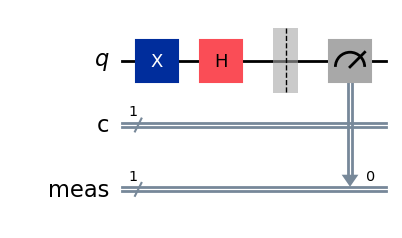

Measurement Result (512 shots): {'0 0': 257, '1 0': 255}

Explanation: The X followed by H transforms |0⟩ → |1⟩ → (|0⟩ - |1⟩)/√2, giving a superposition with inverted probabilities.


In [5]:
# ===============================
# Task 4 — Combine X and H gates
# ===============================
# Objective:
#  - Apply X followed by H gate.
#  - Predict results before running, then verify.

qc_xh = QuantumCircuit(1, 1)
qc_xh.x(0)
qc_xh.h(0)
qc_xh.measure_all()
job_xh = sim.run(transpile(qc_xh, sim), shots=512).result()
counts_xh = job_xh.get_counts()
print("=== Combine X then H (|-⟩ State) ===")
display(qc_xh.draw(output='mpl'))
print("Measurement Result (512 shots):", counts_xh)
print("\nExplanation: The X followed by H transforms |0⟩ → |1⟩ → (|0⟩ - |1⟩)/√2, giving a superposition with inverted probabilities.")


=== Two-Qubit Circuit ===


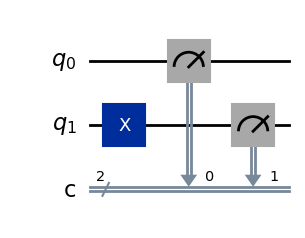

Measurement Result (512 shots): {'10': 512}

Explanation: The circuit prepares |01⟩ deterministically, so all measurements give '01'.


In [6]:
# ===============================
# Task 5 — Two-Qubit Circuit
# ===============================
# Objective:
#  - Qubit 0 = |0⟩
#  - Qubit 1 = |1⟩
#  - Measure both and observe output.

qc_2 = QuantumCircuit(2, 2)
qc_2.x(1)
qc_2.measure([0, 1], [0, 1])
job_2 = sim.run(transpile(qc_2, sim), shots=512).result()
counts_2 = job_2.get_counts()
print("=== Two-Qubit Circuit ===")
display(qc_2.draw(output='mpl'))
print("Measurement Result (512 shots):", counts_2)
print("\nExplanation: The circuit prepares |01⟩ deterministically, so all measurements give '01'.")
